<a href="https://colab.research.google.com/github/hightechguys79/MSAI/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install plotly

from google.colab import files
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery


project_id = 'still-smithy-449518-b7' #@param{type:"string"}

bq_client = bigquery.Client(project = project_id)



In [17]:
# Load patients data

# d1 = files.upload()
# patients = pd.read_csv('PATIENTS.csv')


query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.patients`
"""
query_job = bq_client.query(query)
patients = query_job.to_dataframe()

In [ ]:
#@title Enter Google Cloud/BigQuery Project ID
project_id = 'still-smithy-449518-b7' #@param{type:"string"}

# Package used for interfacing w/ BigQuery from Python
from google.cloud import bigquery

import matplotlib.pyplot as plt
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

# Create BigQuery client
bq_client = bigquery.Client(project = project_id)

    ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID  STARTDATE    ENDDATE DRUG_TYPE  \
0  3640830       45994   182023      229990 2196-01-12 2196-01-15      MAIN   

      DRUG DRUG_NAME_POE DRUG_NAME_GENERIC FORMULARY_DRUG_CD   GSN   NDC  \
0  Heparin       Heparin              None              None  None  <NA>   

  PROD_STRENGTH DOSE_VAL_RX DOSE_UNIT_RX FORM_VAL_DISP FORM_UNIT_DISP ROUTE  
0          None        None         None          None           None    IV  


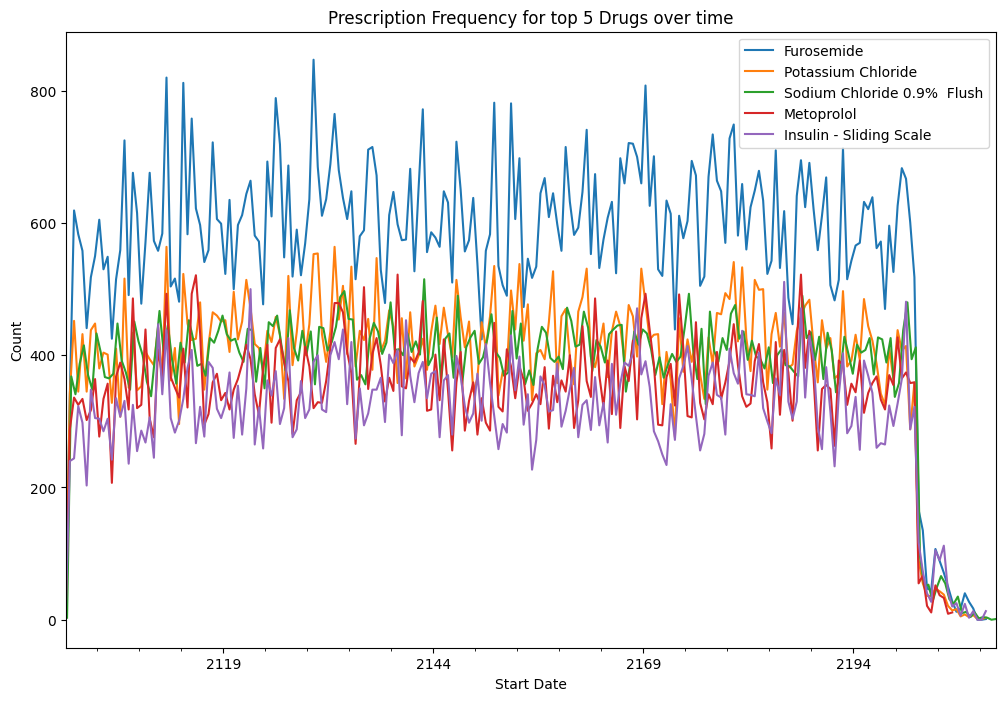

In [18]:
# Define the query to retrieve data from the MIMIC-III admissions table

query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.prescriptions`
"""

# Run the query and fetch the results
query_job = bq_client.query(query)

# Get the results as a pandas DataFrame
df = query_job.to_dataframe()

# Display the DataFrame
print(df.head(1))

drug_counts= df['DRUG_NAME_GENERIC'].value_counts().nlargest(5)
#Plot the time series for the top 5 prescribed drugs
fig, ax = plt.subplots(figsize=(12,8))
for drug in drug_counts.index:
  drug_df = df[df["DRUG_NAME_GENERIC"]==drug]
  drug_df.resample('6ME',on='STARTDATE').size().plot(ax=ax, label=drug)
ax.set_title('Prescription Frequency for top 5 Drugs over time')
ax.set_ylabel('Count')
ax.set_xlabel('Start Date')
ax.legend()
plt.show()

In [19]:
# Load admissions data
#d2 = files.upload()
#admissions = pd.read_csv('ADMISSIONS.csv')
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.admissions`
"""
query_job = bq_client.query(query)
admissions = query_job.to_dataframe()

In [20]:
# Load diagnoses_icd data
#d3 = files.upload()
#diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.diagnoses_icd`
"""
query_job = bq_client.query(query)
diagnoses = query_job.to_dataframe()

In [21]:
# Load ICUSTAYS data
# d4 = files.upload()
# icustays = pd.read_csv('ICUSTAYS.csv')
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.icustays`
"""
query_job = bq_client.query(query)
icustays = query_job.to_dataframe()

In [22]:
# Load D_ICD_DIAGNOSES data
# d4 = files.upload()
# diagnoses_labels = pd.read_csv('D_ICD_DIAGNOSES.csv')
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.diagnoses_icd`
"""
query_job = bq_client.query(query)
diagnoses_labels = query_job.to_dataframe()

## Patients Table

In [23]:
from datetime import datetime
df = patients
# Calculate age function
def calculate_age(dob, dod):
    # Convert dob and dod to datetime objects, handling NaT (Not a Time) values
    dob_date = pd.to_datetime(dob, errors='coerce')  # Use errors='coerce' to handle NaT
    dod_date = pd.to_datetime(dod, errors='coerce')  # Use errors='coerce' to handle NaT

    # Calculate age only if both dob_date and dod_date are valid datetime objects
    if pd.notna(dob_date) and pd.notna(dod_date):
        age = (dod_date - dob_date).days // 365
    else:
        age = pd.NA  # Assign pd.NA if either date is missing
    return age

# Apply calculate_age function to create "age" column
df["age"] = df.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1) # Changed column names to "DOB" and "DOD"


# Filter out rows with age greater than or equal to 120 and those with invalid ages (pd.NA)
filtered_df = df[(df["age"] < 120) & (df['age'].notna())]  # Added condition to filter out pd.NA ages

# Display the updated DataFrame
print(filtered_df.head())

   ROW_ID  SUBJECT_ID GENDER        DOB        DOD   DOD_HOSP    DOD_SSN  \
1   17808       18848      F 2042-08-21 2128-01-08 2128-01-08 2128-01-08   
2   36390       61056      F 2067-04-11 2152-01-08 2152-01-08 2152-01-08   
3   25371       26889      F 2115-11-04 2164-01-08 2164-01-08 2164-01-08   
4   17328       18333      F 2094-01-21 2168-01-08 2168-01-08 2168-01-08   
5    7313        7730      F 2166-03-28 2196-01-08 2196-01-08 2196-01-08   

   EXPIRE_FLAG age  
1            1  85  
2            1  84  
3            1  48  
4            1  74  
5            1  29  


In [24]:
filtered_df["EXPIRE_FLAG"].value_counts()


EXPIRE_FLAG
1    14279
Name: count, dtype: Int64

In [25]:
filtered_df["age"].value_counts()

age
83    503
84    484
81    484
79    475
86    472
     ... 
18      3
1       1
98      1
97      1
15      1
Name: count, Length: 86, dtype: int64

In [26]:
filtered_df["GENDER"].value_counts()

GENDER
M    7982
F    6297
Name: count, dtype: int64

In [27]:
filtered_df['age'].describe()

count     14279
unique       86
top          83
freq        503
Name: age, dtype: int64

In [29]:
filtered_df['age'].loc[df['GENDER'] == 'F'].describe()

count     6297
unique      84
top         83
freq       259
Name: age, dtype: int64

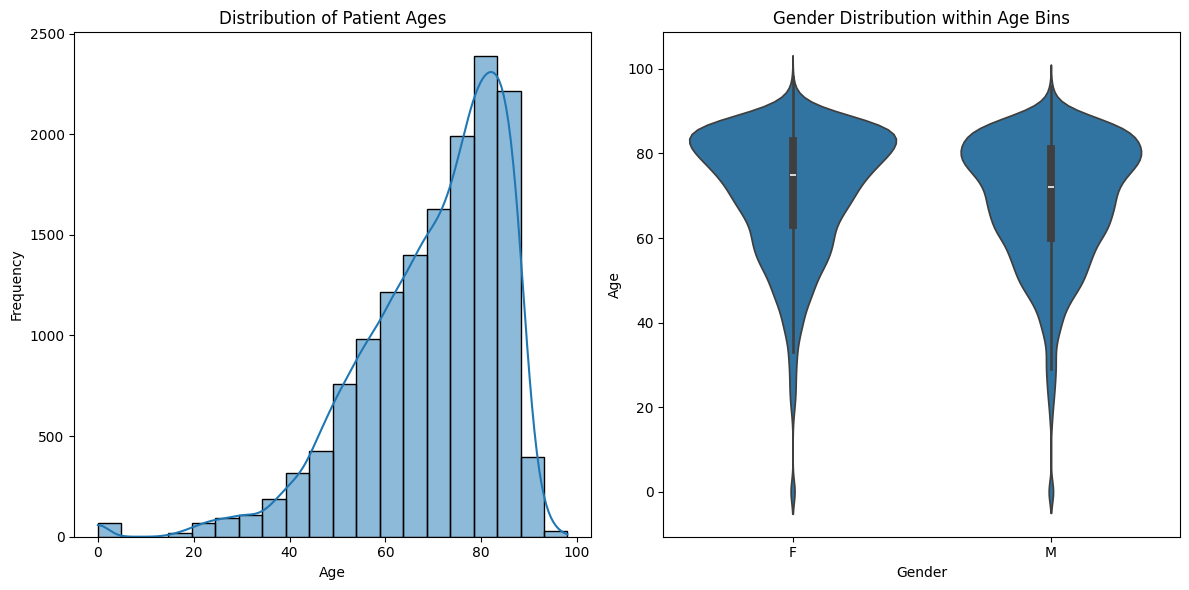

In [30]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# First subplot - Age distribution
plt.subplot(1, 2, 1)
sns.histplot(data=filtered_df, x='age', bins=20, kde=True)
plt.title("Distribution of Patient Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Second subplot - Gender distribution within each age bin
plt.subplot(1, 2, 2)
sns.violinplot(data=filtered_df, x='GENDER', y='age', inner='box')
plt.title("Gender Distribution within Age Bins")
plt.xlabel("Gender")
plt.ylabel("Age")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Patients and Admissions Table

In [31]:
# Merge admissions and patients data on subject_id
merged_data = pd.merge(admissions, filtered_df, on="SUBJECT_ID")
merged_data.head()

ROW_ID_x  SUBJECT_ID  HADM_ID           ADMITTIME           DISCHTIME  \
0      8689        7124   109129 2188-07-11 00:58:00 2188-08-01 12:04:00   
1     12652       10348   121510 2133-04-16 21:12:00 2133-04-23 15:52:00   
2     25262       20691   119601 2198-02-09 14:58:00 2198-02-20 15:33:00   
3      1654        1340   169611 2193-12-17 11:08:00 2193-12-19 13:12:00   
4     16917       13809   188102 2181-10-27 02:52:00 2181-10-29 14:07:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION DISCHARGE_LOCATION  \
0       NaT      EMERGENCY       EMERGENCY ROOM ADMIT                SNF   
1       NaT      EMERGENCY       EMERGENCY ROOM ADMIT                SNF   
2       NaT         URGENT  TRANSFER FROM HOSP/EXTRAM                SNF   
3       NaT      EMERGENCY       EMERGENCY ROOM ADMIT               HOME   
4       NaT      EMERGENCY       EMERGENCY ROOM ADMIT               HOME   

  INSURANCE  ... HOSPITAL_EXPIRE_FLAG HAS_CHARTEVENTS_DATA ROW_ID_y GENDER  \
0  Medicare  ...                    0                    1     6738      M   
1  Medicare  ...                    0                    1     9793      F   
2   Private  ...                    0                    1    19525      F   
3  Medicare  ...                    0                    1     1274      F   
4  Medicare  ...                    0                    1    13057      M   

         DOB        DOD DOD_HOSP    DOD_SSN  EXPIRE_FLAG  age  
0 2135-11-25 2188-08-02      NaT 2188-08-02            1   52  
1 2049-06-08 2133-06-19      NaT 2133-06-19            1   84  
2 2131-10-14 2202-01-16      NaT 2202-01-16            1   70  
3 2115-10-16 2198-09-03      NaT 2198-09-03            1   82  
4 2135-11-20 2183-05-05      NaT 2183-05-05            1   47  

[5 rows x 27 columns]

In [32]:
merged_data['ADMISSION_TYPE'].value_counts()

ADMISSION_TYPE
EMERGENCY    17755
ELECTIVE      2123
URGENT         655
NEWBORN         65
Name: count, dtype: int64

In [33]:
merged_data['ADMISSION_LOCATION'].value_counts()

ADMISSION_LOCATION
EMERGENCY ROOM ADMIT         10694
TRANSFER FROM HOSP/EXTRAM     3720
CLINIC REFERRAL/PREMATURE     3081
PHYS REFERRAL/NORMAL DELI     2885
TRANSFER FROM SKILLED NUR      166
TRANSFER FROM OTHER HEALT       43
** INFO NOT AVAILABLE **         5
HMO REFERRAL/SICK                4
Name: count, dtype: int64

In [34]:
merged_data['INSURANCE'].value_counts()

INSURANCE
Medicare      14113
Private        4567
Medicaid       1502
Government      290
Self Pay        126
Name: count, dtype: int64

In [35]:
merged_data['DISCHARGE_LOCATION'].value_counts()

DISCHARGE_LOCATION
DEAD/EXPIRED                 5305
HOME HEALTH CARE             3841
SNF                          3383
REHAB/DISTINCT PART HOSP     2995
HOME                         2887
LONG TERM CARE HOSPITAL       967
DISC-TRAN CANCER/CHLDRN H     362
HOSPICE-HOME                  308
SHORT TERM HOSPITAL           220
HOSPICE-MEDICAL FACILITY      114
LEFT AGAINST MEDICAL ADVI     111
DISCH-TRAN TO PSYCH HOSP       38
HOME WITH HOME IV PROVIDR      35
ICF                            13
OTHER FACILITY                 13
DISC-TRAN TO FEDERAL HC         5
SNF-MEDICAID ONLY CERTIF        1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'SNF'),
  Text(1, 0, 'HOME'),
  Text(2, 0, 'DEAD/EXPIRED'),
  Text(3, 0, 'HOME HEALTH CARE'),
  Text(4, 0, 'REHAB/DISTINCT PART HOSP'),
  Text(5, 0, 'DISC-TRAN CANCER/CHLDRN H'),
  Text(6, 0, 'LONG TERM CARE HOSPITAL'),
  Text(7, 0, 'HOSPICE-HOME'),
  Text(8, 0, 'SHORT TERM HOSPITAL'),
  Text(9, 0, 'DISC-TRAN TO FEDERAL HC'),
  Text(10, 0, 'HOSPICE-MEDICAL FACILITY'),
  Text(11, 0, 'DISCH-TRAN TO PSYCH HOSP'),
  Text(12, 0, 'HOME WITH HOME IV PROVIDR'),
  Text(13, 0, 'LEFT AGAINST MEDICAL ADVI'),
  Text(14, 0, 'ICF'),
  Text(15, 0, 'OTHER FACILITY'),
  Text(16, 0, 'SNF-MEDICAID ONLY CERTIF')])

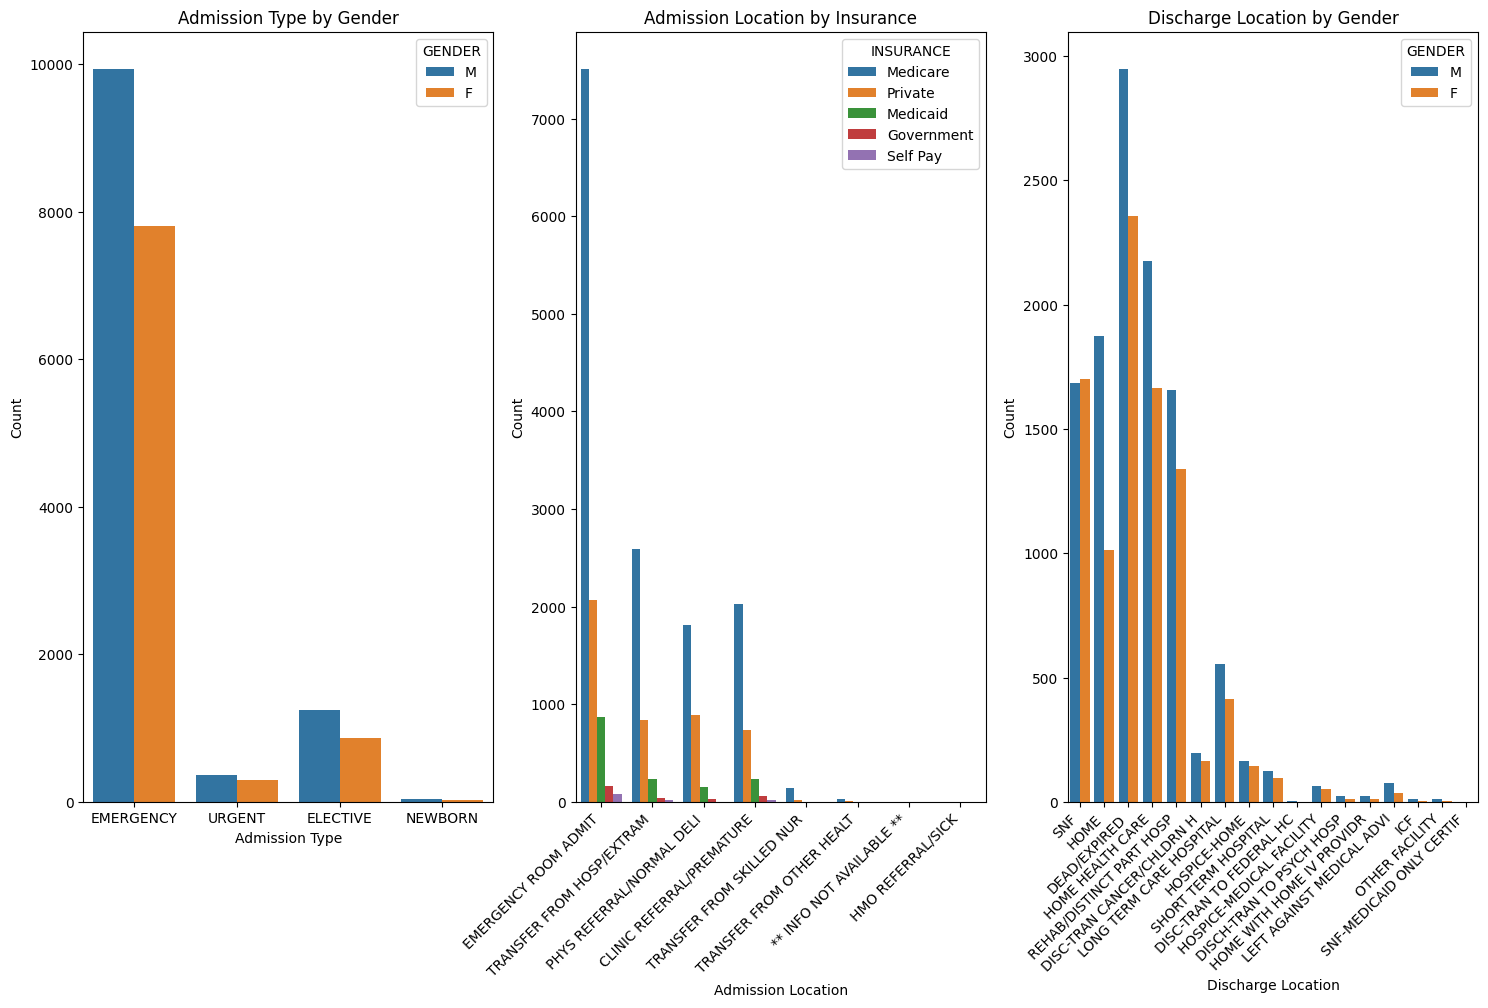

In [36]:
# Create a complex visualization
plt.figure(figsize=(18, 10))

# Analysis 1: Count plot of Admission Types by Gender
plt.subplot(1, 3, 1)
sns.countplot(data=merged_data, x='ADMISSION_TYPE', hue='GENDER')
plt.title("Admission Type by Gender")
plt.xlabel("Admission Type")
plt.ylabel("Count")

# Analysis 2: Count plot of Admission Locations by Insurance
plt.subplot(1, 3, 2)
sns.countplot(data=merged_data, x='ADMISSION_LOCATION', hue='INSURANCE')
plt.title("Admission Location by Insurance")
plt.xlabel("Admission Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Analysis 3: Count plot of Discharge Locations by Gender
plt.subplot(1, 3, 3)
sns.countplot(data=merged_data, x='DISCHARGE_LOCATION', hue='GENDER')
plt.title("Discharge Location by Gender")
plt.xlabel("Discharge Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

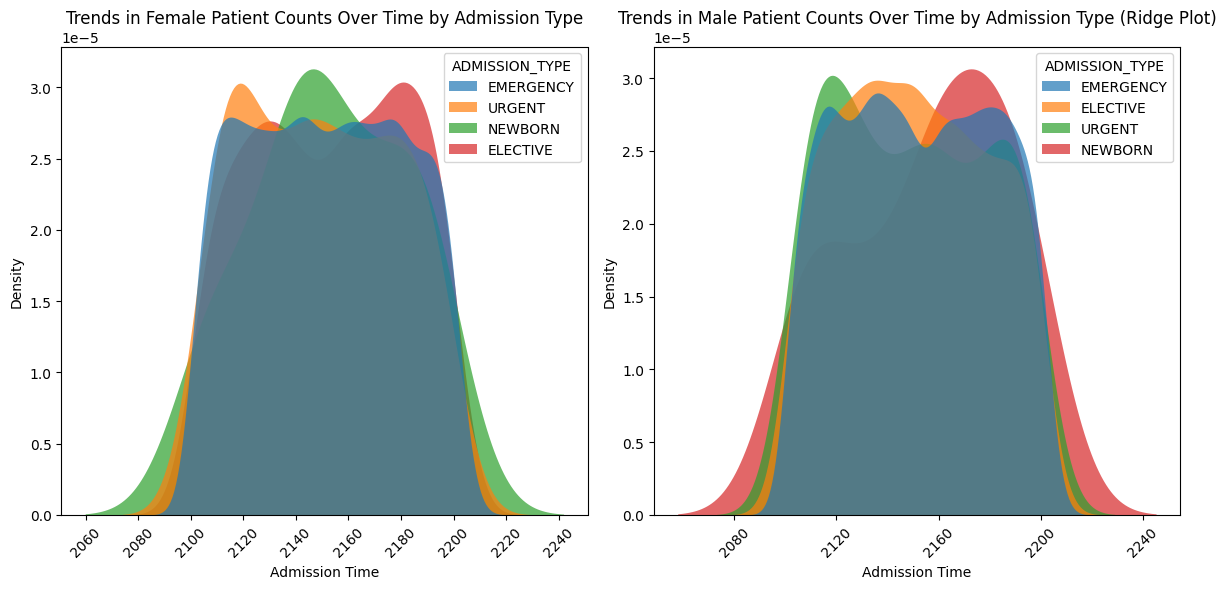

In [37]:
merged_data['ADMITTIME'] = pd.to_datetime(merged_data['ADMITTIME'])  # Convert to datetime

# Filter data for male and female patients
male_data = merged_data[merged_data['GENDER'] == 'M']
female_data = merged_data[merged_data['GENDER'] == 'F']

# Create separate Ridge Plots for male and female patients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=female_data, x='ADMITTIME', hue='ADMISSION_TYPE', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='Female')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Trends in Female Patient Counts Over Time by Admission Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.kdeplot(data=male_data, x='ADMITTIME', hue='ADMISSION_TYPE', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='Male')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Trends in Male Patient Counts Over Time by Admission Type (Ridge Plot)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Different types of plots that convey same information

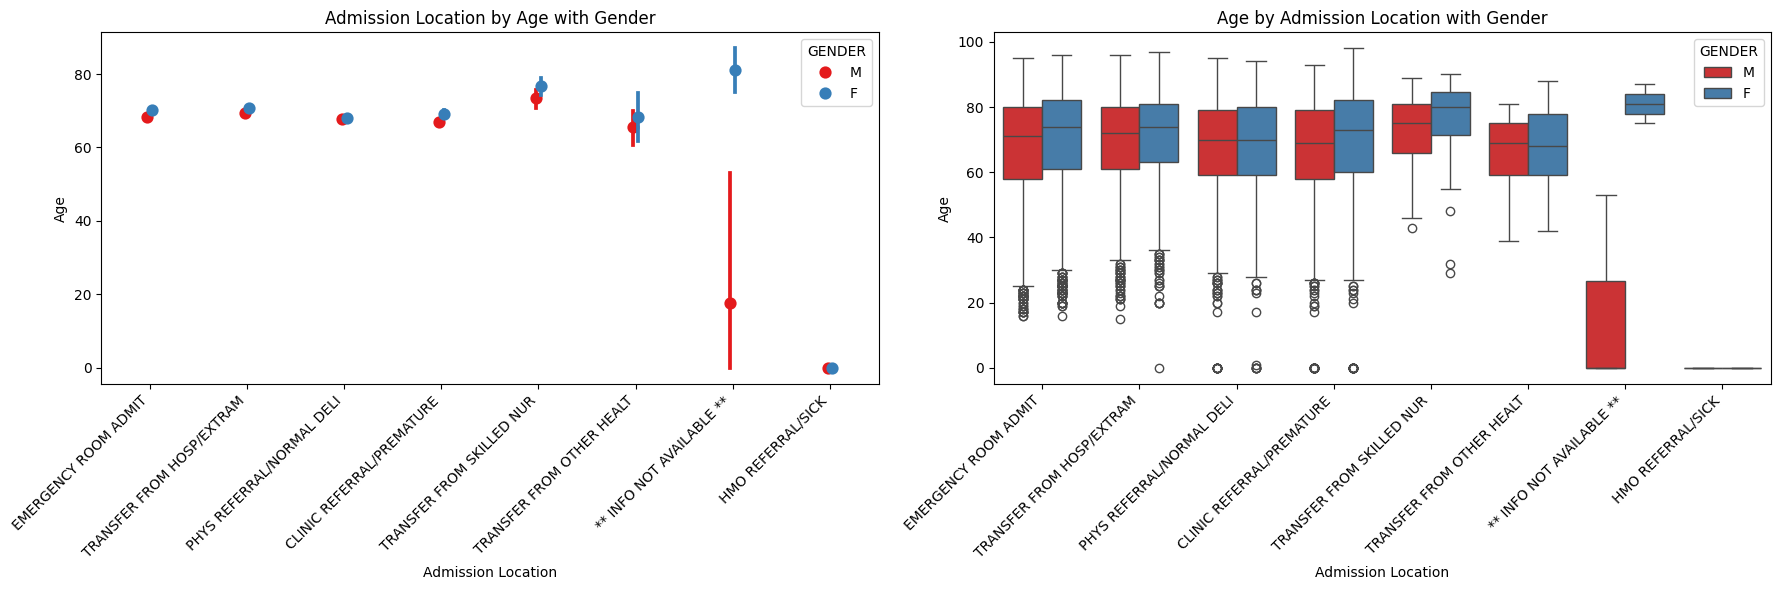

In [38]:
# Create a complex visualization using subplots
plt.figure(figsize=(18, 6))

# Point plot of Admission Location by Age with Gender color hue
plt.subplot(1, 2, 1)
sns.pointplot(data=merged_data, x='ADMISSION_LOCATION', y='age', hue='GENDER', palette='Set1', dodge=True, linestyles="")
plt.title("Admission Location by Age with Gender")
plt.xlabel("Admission Location")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')

# Box plot of Age by Admission Location with Gender color hue
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_data, x='ADMISSION_LOCATION', y='age', hue='GENDER', palette='Set1')
plt.title("Age by Admission Location with Gender")
plt.xlabel("Admission Location")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
merged_data['RELIGION'].value_counts()

RELIGION
CATHOLIC                  7947
NOT SPECIFIED             3176
PROTESTANT QUAKER         2871
UNOBTAINABLE              2403
JEWISH                    2074
OTHER                      937
EPISCOPALIAN               324
GREEK ORTHODOX             188
CHRISTIAN SCIENTIST        106
BUDDHIST                    80
MUSLIM                      76
JEHOVAH'S WITNESS           70
UNITARIAN-UNIVERSALIST      40
ROMANIAN EAST. ORTH         28
7TH DAY ADVENTIST           18
BAPTIST                     17
HINDU                       13
HEBREW                       7
METHODIST                    5
LUTHERAN                     1
Name: count, dtype: int64

In [46]:
merged_data['ETHNICITY'].value_counts()

ETHNICITY
WHITE                                                       14764
UNKNOWN/NOT SPECIFIED                                        1991
BLACK/AFRICAN AMERICAN                                       1900
HISPANIC OR LATINO                                            398
OTHER                                                         339
ASIAN                                                         314
UNABLE TO OBTAIN                                              265
PATIENT DECLINED TO ANSWER                                    139
HISPANIC/LATINO - PUERTO RICAN                                 77
ASIAN - CHINESE                                                71
BLACK/CAPE VERDEAN                                             52
WHITE - RUSSIAN                                                51
WHITE - OTHER EUROPEAN                                         26
PORTUGUESE                                                     23
MULTI RACE ETHNICITY                                           20
ASIAN - ASIAN INDIAN                                           20
BLACK/HAITIAN                                                  14
HISPANIC/LATINO - DOMINICAN                                    14
HISPANIC/LATINO - GUATEMALAN                                   13
AMERICAN INDIAN/ALASKA NATIVE                                  12
HISPANIC/LATINO - CUBAN                                        11
ASIAN - VIETNAMESE                                             11
ASIAN - CAMBODIAN                                              10
BLACK/AFRICAN                                                  10
WHITE - BRAZILIAN                                              10
MIDDLE EASTERN                                                  9
WHITE - EASTERN EUROPEAN                                        8
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER                       6
ASIAN - FILIPINO                                                5
HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)                      4
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE        3
ASIAN - OTHER                                                   3
ASIAN - KOREAN                                                  3
ASIAN - JAPANESE                                                2
Name: count, dtype: int64

## Heatmap

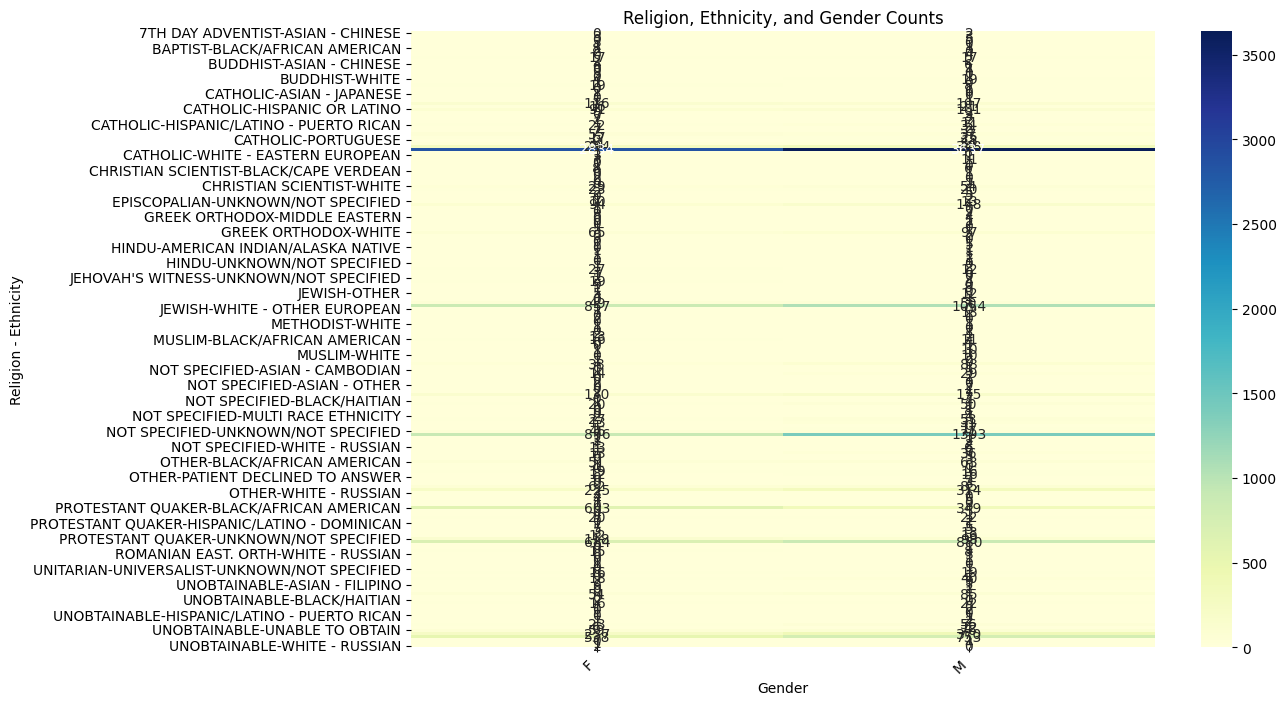

In [47]:
# Create a pivot table to prepare data for the heatmap
# Check if 'religion' is a valid column name; otherwise, use the correct column name
pivot_table = merged_data.groupby(['RELIGION', 'ETHNICITY', 'GENDER']).size().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Religion, Ethnicity, and Gender Counts")
plt.xlabel("Gender")
plt.ylabel("Religion - Ethnicity")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

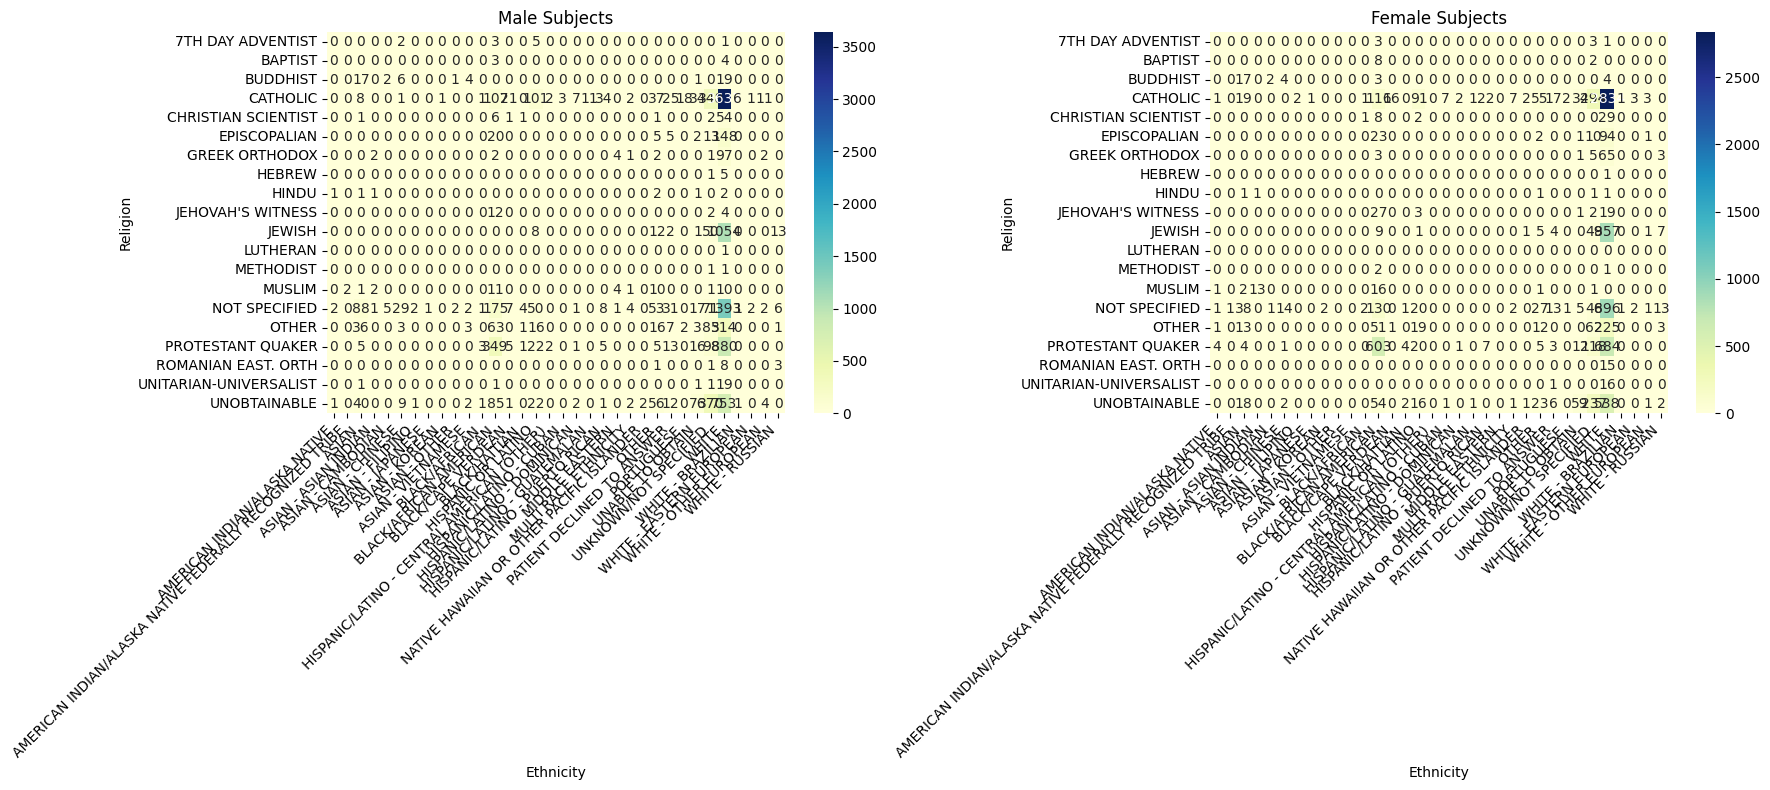

In [48]:
# Create a cross-tabulation of religion, ethnicity, and gender
cross_tab = pd.crosstab(index=[merged_data['RELIGION'], merged_data['ETHNICITY']], columns=merged_data['GENDER'])

# Reset the index for better plot compatibility
cross_tab = cross_tab.reset_index()

# Melt the cross-tabulation for heatmaps
melted_cross_tab = pd.melt(cross_tab, id_vars=['RELIGION', 'ETHNICITY'], value_vars=['M', 'F'], var_name='GENDER')

# Create separate heatmaps for male and female subjects using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Male Subjects Heatmap
male_pivot = melted_cross_tab[melted_cross_tab['GENDER'] == 'M'].pivot_table(index='RELIGION', columns='ETHNICITY', values='value', aggfunc='sum', fill_value=0)
sns.heatmap(male_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Male Subjects")
axes[0].set_xlabel("Ethnicity")
axes[0].set_ylabel("Religion")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Female Subjects Heatmap
female_pivot = melted_cross_tab[melted_cross_tab['GENDER'] == 'F'].pivot_table(index='RELIGION', columns='ETHNICITY', values='value', aggfunc='sum', fill_value=0)
sns.heatmap(female_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Female Subjects")
axes[1].set_xlabel("Ethnicity")
axes[1].set_ylabel("Religion")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Patients, Admissions, and Diagnosis_icd Tables

In [51]:
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.d_icd_diagnoses`
"""
query_job = bq_client.query(query)
diagnoses_labels = query_job.to_dataframe()

# Convert the DataFrame to a dictionary to link icd9 codes to respective labels
icd9_dict = diagnoses_labels.set_index('ICD9_CODE')['SHORT_TITLE'].to_dict()

# Print the dictionary
print(icd9_dict)

{'436': 'Cva', '78001': 'Coma', 'E0062': 'Golf', '0460': 'Kuru', '30752': 'Pica', 'E9601': 'Rape', 'E0051': 'Yoga', '78603': 'Apnea', '4292': 'Ascvd', '7897': 'Colic', '7862': 'Cough', '4644': 'Croup', '7823': 'Edema', '68101': 'Felon', 'E0072': 'Rugby', '1360': 'Ainhum', '31501': 'Alexia', '43884': 'Ataxia', 'E0080': 'Boxing', '7271': 'Bunion', '05101': 'Cowpox', '061': 'Dengue', '3671': 'Myopia', '78261': 'Pallor', '071': 'Rabies', '99591': 'Sepsis', 'E0121': 'Sewing', 'E0075': 'Soccer', '7817': 'Tetany', '1120': 'Thrush', '37931': 'Aphakia', '7843': 'Aphasia', '78441': 'Aphonia', 'E0063': 'Bowling', '4280': 'CHF NOS', 'E0050': 'Dancing', '7881': 'Dysuria', 'E0083': 'Frisbee', '1025': 'Gangosa', '36441': 'Hyphema', 'E0133': 'Ironing', 'E0131': 'Laundry', '1252': 'Loiasis', '7242': 'Lumbago', '1340': 'Myiasis', 'E0103': 'Pilates', '6982': 'Prurigo', 'V211': 'Puberty', '0830': 'Q fever', '6953': 'Rosacea', 'E0011': 'Running', '1330': 'Scabies', '05912': 'Sealpox', '7861': 'Stridor', '6

Creating a dictionary instead of joining two tables is more efficient. However, the impact depends on several factors. Proper indexing, query optimization, and consideration of your specific database system and hardware resources can help mitigate performance issues when joining tables, whereas creating a dictionary is easier and efficient as it uses the concept of hashing.

In [52]:
# Merge diagnosis_icd with admissions on subject_id
merged_data_diagnosis = pd.merge(merged_data, diagnoses, on='SUBJECT_ID', how='inner')

# Get the top diagnosis codes for each gender
top_diagnosis_codes_male = merged_data_diagnosis[merged_data_diagnosis['GENDER'] == 'M']['ICD9_CODE'].value_counts().head(10)
top_diagnosis_codes_female = merged_data_diagnosis[merged_data_diagnosis['GENDER'] == 'F']['ICD9_CODE'].value_counts().head(10)

<ipython-input-53-a10d1991e88f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-53-a10d1991e88f>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




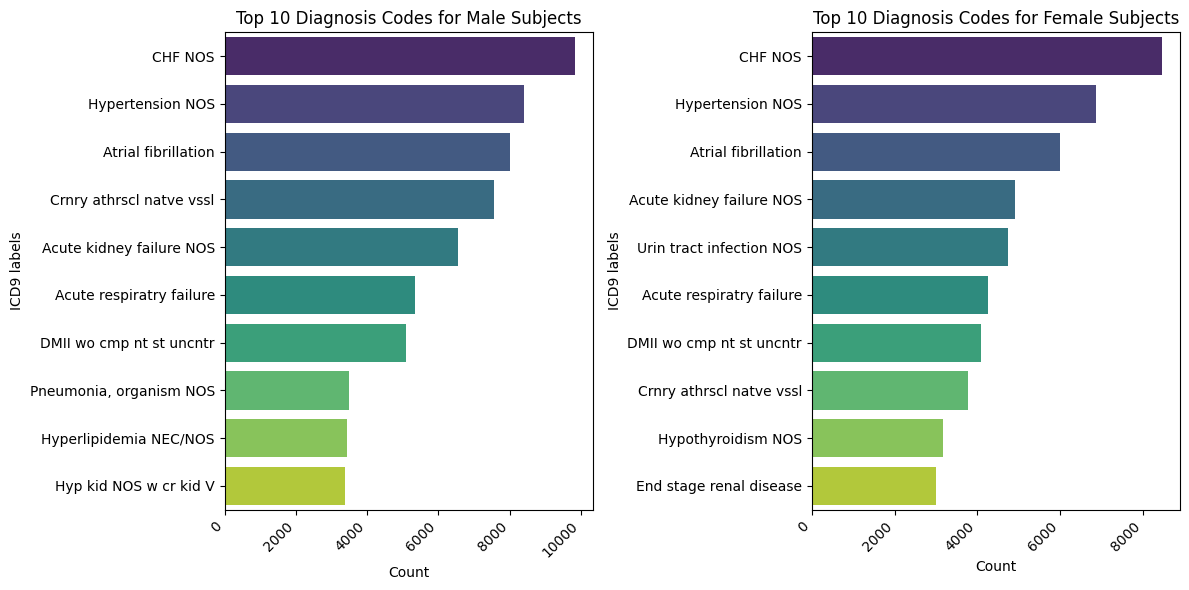

In [53]:
# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Subplot for Male Subjects
plt.subplot(1, 2, 1)
sns.barplot(x=top_diagnosis_codes_male.values, y=top_diagnosis_codes_male.index, palette='viridis')
plt.title("Top 10 Diagnosis Codes for Male Subjects")
plt.xlabel("Count")
plt.ylabel("ICD9 labels")
plt.xticks(rotation=45, ha='right')

# Label the x-axis ticks with short titles
male_short_titles = [icd9_dict[code] for code in top_diagnosis_codes_male.index]
plt.yticks(range(10), male_short_titles)

# Subplot for Female Subjects
plt.subplot(1, 2, 2)
sns.barplot(x=top_diagnosis_codes_female.values, y=top_diagnosis_codes_female.index, palette='viridis')
plt.title("Top 10 Diagnosis Codes for Female Subjects")
plt.xlabel("Count")
plt.ylabel("ICD9 labels")
plt.xticks(rotation=45, ha='right')

# Label the x-axis ticks with short titles
female_short_titles = [icd9_dict[code] for code in top_diagnosis_codes_female.index]
plt.yticks(range(10), female_short_titles)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The above plots can be visualized using another python library Plotly. The plots are more interactive and easy to visualize

In [54]:
import pandas as pd
import plotly.graph_objects as go

# Create a DataFrame for male and female diagnosis codes
male_df = pd.DataFrame({'icd9_code': top_diagnosis_codes_male.index, 'count': top_diagnosis_codes_male.values})
female_df = pd.DataFrame({'icd9_code': top_diagnosis_codes_female.index, 'count': top_diagnosis_codes_female.values})

# Map ICD-9 codes to short titles
male_df['labels'] = male_df['icd9_code'].map(icd9_dict)
female_df['labels'] = female_df['icd9_code'].map(icd9_dict)

# Create a new column 'hover_text' that combines 'icd9_code', 'labels', and 'count'
male_df['hover_text'] = male_df['icd9_code'] + '<br>Disease name: ' + male_df['labels'] + '<br>ICD-9 Code: ' + male_df['icd9_code'] + '<br>Count: ' + male_df['count'].astype(str)
female_df['hover_text'] = female_df['icd9_code'] + '<br>Disease name: ' + female_df['labels'] + '<br>ICD-9 Code: ' + female_df['icd9_code'] + '<br>Count: ' + female_df['count'].astype(str)

# Create treemaps using Plotly Graph Objects with custom hover data and template
fig_male = go.Figure(go.Treemap(
    labels=male_df['labels'],
    parents=[''] * len(male_df),  # Set parent to empty string to remove parent levels
    values=male_df['count'],
    customdata=male_df[['icd9_code', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_male.update_layout(title='Top 10 Diagnosis Codes for Male Subjects')

fig_female = go.Figure(go.Treemap(
    labels=female_df['labels'],
    parents=[''] * len(female_df),  # Set parent to empty string to remove parent levels
    values=female_df['count'],
    customdata=female_df[['icd9_code', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_female.update_layout(title='Top 10 Diagnosis Codes for Female Subjects')

# Show the treemaps
fig_male.show()
fig_female.show()


In [55]:
icustays

ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID    DBSOURCE FIRST_CAREUNIT  \
0       21891       17239   156279      203333        both            CCU   
1       35298       27810   118521      299036        both            CCU   
2       39733       31454   117800      209490        both            CCU   
3       37755       29805   196011      212996        both            CCU   
4       34046       26849   199270      298791        both            CCU   
...       ...         ...      ...         ...         ...            ...   
61527   59786       94889   147635      252338  metavision           SICU   
61528   59787       94896   167802      242378  metavision           SICU   
61529   59797       94924   186391      290051  metavision           SICU   
61530   59804       94937   156213      293838  metavision           SICU   
61531   59808       94953   196881      241585  metavision           SICU   

      LAST_CAREUNIT  FIRST_WARDID  LAST_WARDID              INTIME  \
0               CCU             7            7 2133-10-23 15:19:16   
1               CCU             7            7 2122-08-07 14:35:31   
2               CCU             7            7 2143-08-21 00:20:52   
3               CCU             7            7 2154-07-02 12:09:06   
4               CCU             7            7 2136-08-01 16:35:56   
...             ...           ...          ...                 ...   
61527          SICU            57           57 2124-11-22 21:55:59   
61528          SICU            57           57 2200-02-26 18:40:12   
61529          SICU            57           57 2134-01-08 21:59:39   
61530          SICU            57           57 2107-02-05 17:16:52   
61531          SICU            57           57 2160-03-03 16:09:11   

                  OUTTIME     LOS  
0     2133-10-29 21:27:49  6.2559  
1     2122-08-09 22:45:29  2.3403  
2     2143-08-24 14:28:40  3.5888  
3     2154-07-08 14:23:46  6.0935  
4     2136-08-04 18:50:08  3.0932  
...                   ...     ...  
61527 2124-11-24 18:04:42  1.8394  
61528 2200-02-27 12:16:19  0.7334  
61529 2134-01-09 18:29:16  0.8539  
61530 2107-02-06 21:53:10  1.1919  
61531 2160-03-04 14:22:33  0.9259  

[61532 rows x 12 columns]

##Time series plots

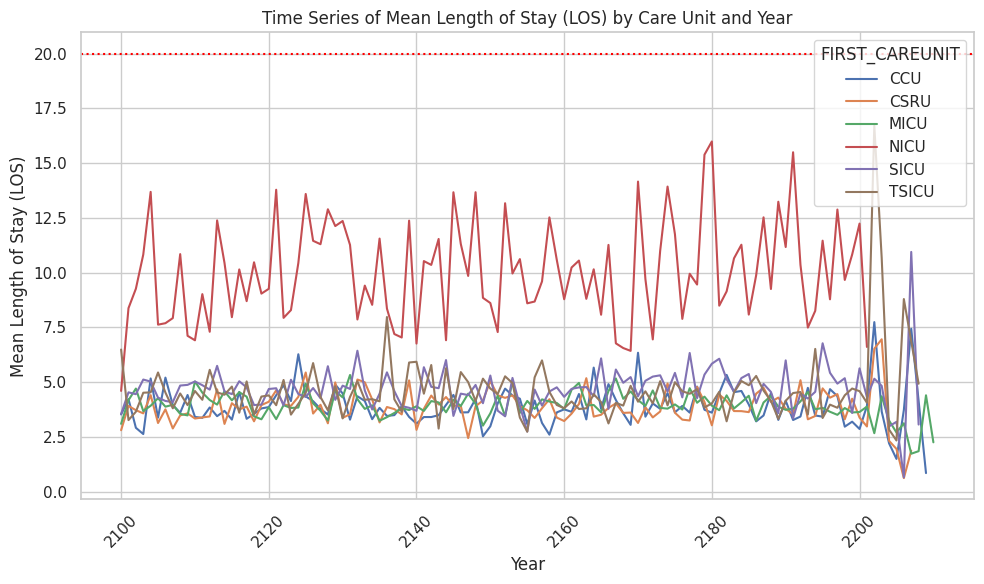

In [56]:
icustays['INTIME'] = pd.to_datetime(icustays['INTIME'])
icustays['OUTTIME'] = pd.to_datetime(icustays['OUTTIME'])

# Extract the year from 'intime'
icustays['intime_year'] = icustays['INTIME'].dt.year

# Calculate the mean LOS for each care unit and year
los_stats = icustays.groupby(['FIRST_CAREUNIT', 'intime_year'])['LOS'].mean().reset_index()

# Plot the time series of mean LOS by care unit and year
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(data=los_stats, x='intime_year', y='LOS', hue='FIRST_CAREUNIT')

# Add a horizontal dotted line to identify the threshold
threshold = 20  # Set your threshold value here
plt.axhline(y=threshold, color='red', linestyle='dotted', label=f'Threshold ({threshold})')

plt.title("Time Series of Mean Length of Stay (LOS) by Care Unit and Year")
plt.xlabel("Year")
plt.ylabel("Mean Length of Stay (LOS)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
# Create an interactive line plot using Plotly Express
import plotly.express as px
fig = px.line(los_stats, x='intime_year', y='LOS', color='FIRST_CAREUNIT',
              title='Time Series of Mean Length of Stay (LOS) by Care Unit and Year',
              labels={'intime_year': 'Year', 'los': 'Mean Length of Stay (LOS)'},
              template='plotly_white')

# Add a horizontal line to indicate the threshold
fig.add_hline(y=threshold, line_dash="dash", line_color="red", annotation_text=f'Threshold ({threshold})')

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

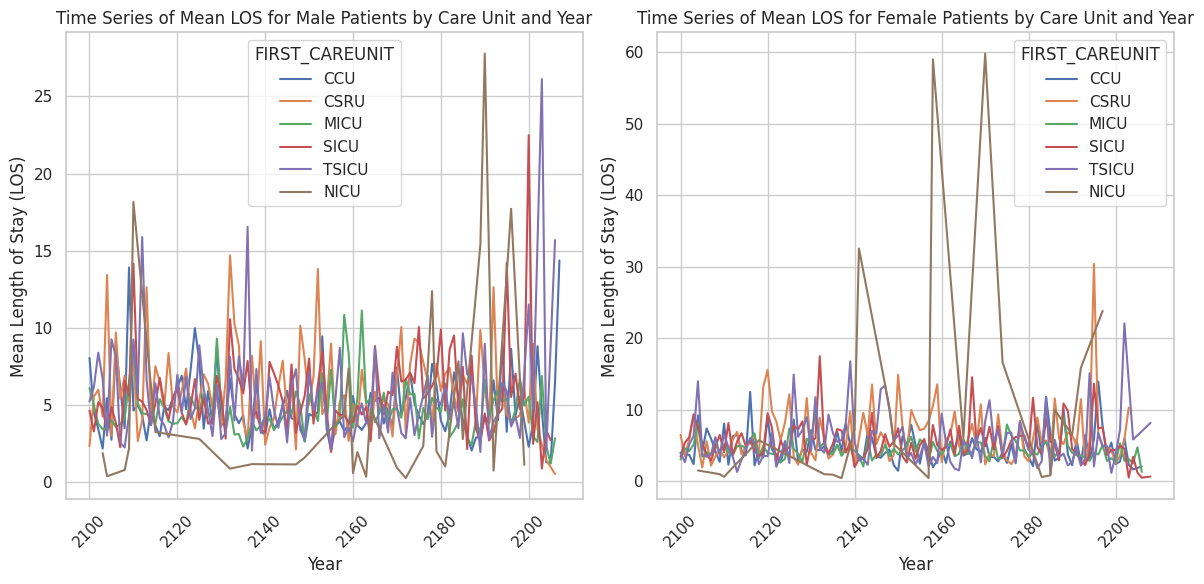

In [58]:
# Merge icustays, admissions and patients on subject_id
merged_data_icu = pd.merge(icustays, merged_data, on='SUBJECT_ID', how='inner')

# Extract the year from 'intime'
merged_data_icu['intime_year'] = merged_data_icu['INTIME'].dt.year

# Filter data for male and female patients
male_data = merged_data_icu[merged_data_icu['GENDER'] == 'M']
female_data = merged_data_icu[merged_data_icu['GENDER'] == 'F']

# Create separate time series plots for male and female patients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
sns.lineplot(data=male_data.groupby(['intime_year', 'FIRST_CAREUNIT'])['LOS'].mean().reset_index(),
             x='intime_year', y='LOS', hue='FIRST_CAREUNIT')
plt.title("Time Series of Mean LOS for Male Patients by Care Unit and Year")
plt.xlabel("Year")
plt.ylabel("Mean Length of Stay (LOS)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.set(style="whitegrid")
sns.lineplot(data=female_data.groupby(['intime_year', 'FIRST_CAREUNIT'])['LOS'].mean().reset_index(),
             x='intime_year', y='LOS', hue='FIRST_CAREUNIT')
plt.title("Time Series of Mean LOS for Female Patients by Care Unit and Year")
plt.xlabel("Year")
plt.ylabel("Mean Length of Stay (LOS)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##Scatterplot

Jointplot is primarily used to visualize the relationship between two numeric variables.

Jointplot is typically used to visualize the interaction between two variables and doesn't involve grouping or categorization.

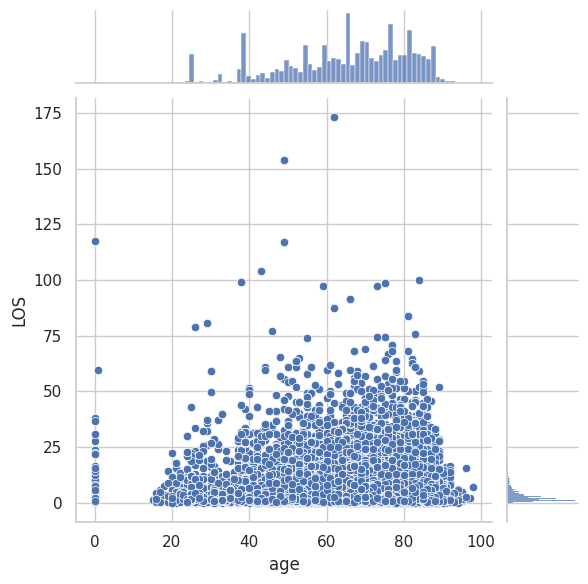

In [59]:
# Create a joint plot using Seaborn
sns.set(style="whitegrid")
sns.jointplot(data=merged_data_icu, x='age', y='LOS', kind='scatter')
plt.show()

FacetGrid is used for creating a grid of subplots, where each subplot represents a subset of the data based on one or more categorical variables.

FacetGrid allows you to compare different groups or categories within your data and see how relationships or distributions vary across them.

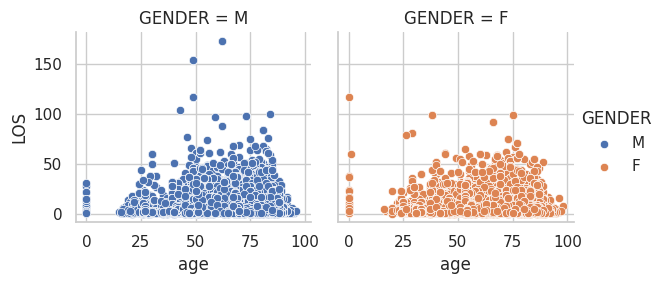

In [60]:
# Create a facet grid of joint plots for each gender
g = sns.FacetGrid(merged_data_icu, col='GENDER', hue='GENDER')
g.map(sns.scatterplot, 'age', 'LOS')
g.add_legend()
plt.show()

1. Relationship between Age and LOS, Colored by Insurance


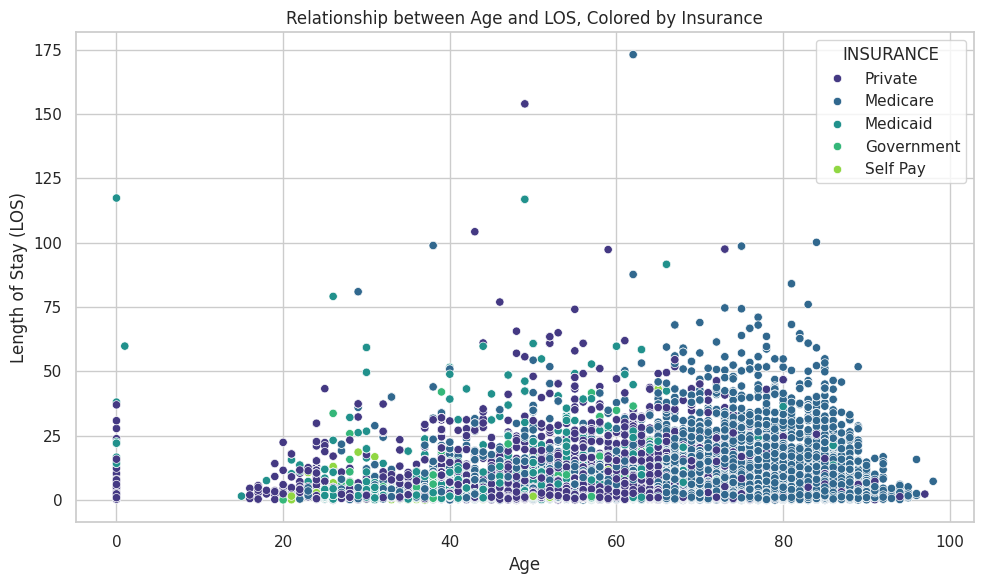

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_icu, x='age', y='LOS', hue='INSURANCE', palette='viridis')
plt.title('Relationship between Age and LOS, Colored by Insurance')
plt.xlabel('Age')
plt.ylabel('Length of Stay (LOS)')
plt.tight_layout()
plt.show()

2. Time Series of ICU Admissions by Admission Source


In [84]:
merged_data_icu['ADMITTIME'] = pd.to_datetime(merged_data_icu['ADMITTIME'])

icu_admissions = merged_data_icu.groupby([merged_data_icu['ADMITTIME'].dt.date, 'ADMISSION_LOCATION'])['ICUSTAY_ID'].count().reset_index()

fig = px.line(icu_admissions, x='ADMITTIME', y='ICUSTAY_ID', color='ADMISSION_LOCATION',
              title='Time Series of ICU Admissions by Admission Source',
              labels={'ADMITTIME': 'Date', 'ICUSTAY_ID': 'Number of Admissions'})
fig.show()

In summary, jointplot is used to visualize the relationship between two numeric variables, whereas FacetGrid is used to create a grid of subplots for comparing relationships or distributions within different categorical groups. The choice between the two depends on whether you're focusing on the relationship between two variables (for jointplot) or exploring different aspects of your data across categories (for FacetGrid).

<ipython-input-66-a4ba3e2d6baf>:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




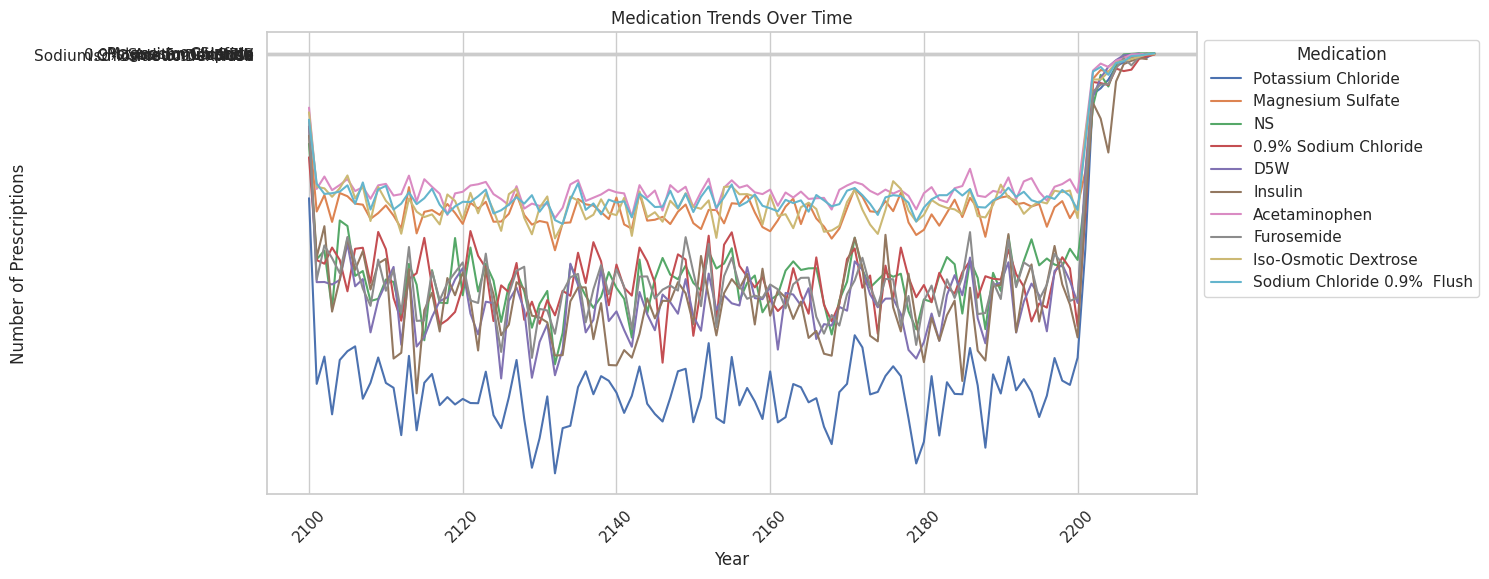

In [66]:
# Load data

query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.prescriptions`
"""
query_job = bq_client.query(query)
prescriptions = query_job.to_dataframe()

prescriptions['STARTDATE'] = pd.to_datetime(prescriptions['STARTDATE'])

# no. of prescriptions per year
prescriptions['Year'] = prescriptions['STARTDATE'].dt.year
top_meds = prescriptions['DRUG'].value_counts().head(10).index
filtered_data = prescriptions[prescriptions['DRUG'].isin(top_meds)]

# Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Year', y='DRUG', hue='DRUG', estimator='count', ci=None)
plt.title('Medication Trends Over Time')
plt.ylabel('Number of Prescriptions')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Medication', bbox_to_anchor=(1,1))
plt.show()


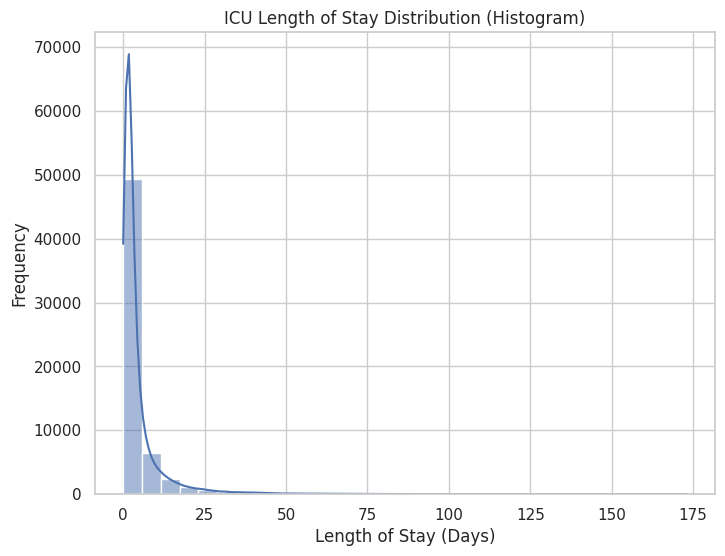

In [67]:
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.icustays`
"""
query_job = bq_client.query(query)
icustays = query_job.to_dataframe()

plt.figure(figsize=(8, 6))
sns.histplot(icustays['LOS'], bins=30, kde=True)
plt.title('ICU Length of Stay Distribution (Histogram)')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.show()


fig = px.histogram(icustays, x="LOS", nbins=30,
                   title="ICU Length of Stay Distribution",
                   labels={"LOS": "Length of Stay (Days)"})
fig.show()

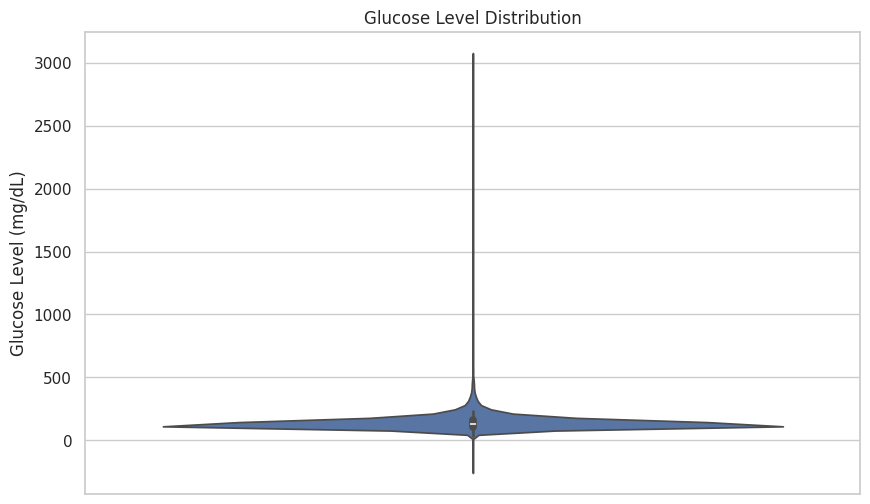

In [69]:
query = """
    SELECT *
    FROM `physionet-data.mimiciii_clinical.labevents`
"""
query_job = bq_client.query(query)
labevents = query_job.to_dataframe()


glucose_tests = labevents[labevents['ITEMID'] == 50809]

# Plot
plt.figure(figsize=(10, 6))
sns.violinplot(y=glucose_tests['VALUENUM'])
plt.title('Glucose Level Distribution')
plt.ylabel('Glucose Level (mg/dL)')
plt.show()